### Model Diagnostics in Python

In this notebook, you will be trying out some of the model diagnostics you saw from Sebastian, but in your case there will only be two cases - either admitted or not admitted.

First let's read in the necessary libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

df = pd.read_csv('./admissions.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


`1.` Change prestige to dummy variable columns that are added to `df`.  Then divide your data into training and test data.  Create your test set as 20% of the data, and use a random state of 0.  Your response should be the `admit` column.  [Here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) are the docs, which can also find with a quick google search if you get stuck.

In [2]:
df['intercept'] = 1
df[['level_1','level_2','level_3','level_4']] = pd.get_dummies(df['prestige'])
df.head()

,admit,gre,gpa,prestige,intercept,level_1,level_2,level_3,level_4
0,0,380,3.61,3,1,0,0,1,0
1,1,660,3.67,3,1,0,0,1,0
2,1,800,4.00,1,1,1,0,0,0
3,1,640,3.19,4,1,0,0,0,1
4,0,520,2.93,4,1,0,0,0,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[['intercept','gre','gpa','level_1','level_2','level_3']], df['admit'], test_size=0.20, random_state=0)
print('X_train : ', X_train.shape[0])
print('X_test : ', X_test.shape[0])

X_train :  317
X_test :  80


`2.` Now use [sklearn's Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit a logistic model using `gre`, `gpa`, and 3 of your `prestige` dummy variables.  For now, fit the logistic regression model without changing any of the hyperparameters.  

The usual steps are:
* Instantiate
* Fit (on train)
* Predict (on test)
* Score (compare predict to test)

As a first score, obtain the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).  Then answer the first question below about how well your model performed on the test data.

In [4]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
y_preds = logistic_model.predict(X_test)
print(precision_score(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
confusion_matrix(y_test,y_preds)

1.0
0.725
0.0833333333333


array([[56,  0],
       [22,  2]])

`3.` Now, try out a few additional metrics: [precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and [accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) are all popular metrics, which you saw with Sebastian.  You could compute these directly from the confusion matrix, but you can also use these built in functions in sklearn.

Another very popular set of metrics are [ROC curves and AUC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py).  These actually use the probability from the logistic regression models, and not just the label.  [This](http://blog.yhat.com/posts/roc-curves.html) is also a great resource for understanding ROC curves and AUC.

Try out these metrics to answer the second quiz question below.  I also provided the ROC plot below.  The ideal case is for this to shoot all the way to the upper left hand corner.  Again, these are discussed in more detail in the Machine Learning Udacity program.

In [6]:
! pip install ggplot

/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


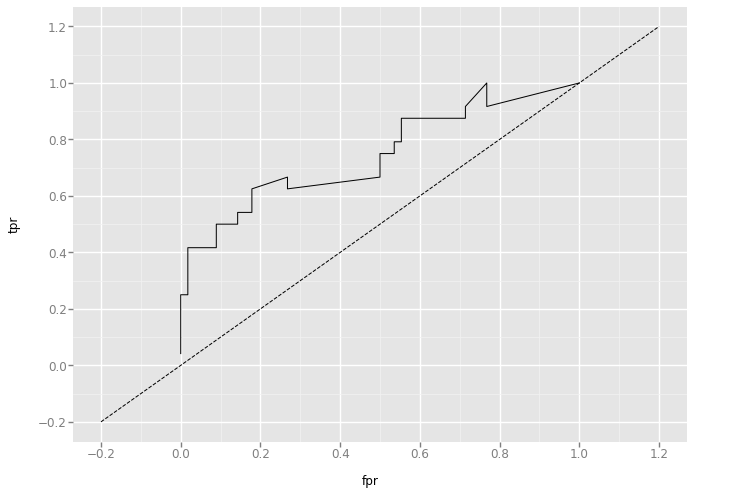

<ggplot: (-9223363302751391323)>

In [7]:
### Unless you install the ggplot library in the workspace, you will 
### get an error when running this code!

from ggplot import *
from sklearn.metrics import roc_curve, auc
%matplotlib inline

preds = logistic_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')